In this step, we import the necessary libraries for data analysis and visualization.

- pandas: For data manipulation and analysis
- datetime: For date and time operations
- seaborn: For data visualization
- matplotlib: For creating static, animated, and interactive visualizations in Python

In [87]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

We create a list containing the URLs of the MTA turnstile data files.

- url_list: A list containing the URLs of the data files we want to download

In [88]:
url_list = [
    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_230107.txt",
    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_230114.txt",
    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_230121.txt",
    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_230128.txt",
    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_230204.txt",
    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_230211.txt",
    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_230218.txt",
    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_230225.txt",
    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_230304.txt",
    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_230311.txt",
    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_230318.txt",
]

We load the data from the URLs in the list into individual DataFrames.

- dataframes: A list of DataFrames, each containing data from one of the URLs

In [89]:
dataframes = [pd.read_csv(url) for url in url_list]

Finally, we concatenate all the DataFrames in the list into a single DataFrame.

- df: The final DataFrame containing data from all the URLs

In [199]:
df = pd.concat(dataframes, ignore_index=True)

The following line of code uses the `df.columns` attribute to access the column labels of a pandas DataFrame (`df`). This is useful for getting a better understanding of the dataset's structure or for performing operations on specific columns. The `df.columns` attribute returns an Index object containing the column labels.

In [200]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

The following line of code uses the `str.strip()` method to remove any leading and trailing whitespace from the column labels of a pandas DataFrame (`df`). This can be helpful for cleaning up column names and ensuring consistency when performing operations on the DataFrame. After stripping the whitespace, the cleaned column labels are reassigned to `df.columns`.

The subsequent line prints the updated column labels to the console.

In [201]:
df.columns=df.columns.str.strip()
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

The following line of code uses the `df.head()` method to display the first few rows of a pandas DataFrame (`df`).

In [202]:
a = df.head(10)
a.to_excel("output.xlsx", sheet_name='MTA Turnstile Data') 

The given code utilizes the Pandas library in Python to count the number of duplicate rows in a DataFrame. It filters the DataFrame to include only the rows with duplicate values in the specified columns, namely "C/A", "UNIT", "SCP", "STATION", "DATE", and "TIME". 

The `df.loc` method is used to filter the DataFrame based on the specified subset of columns, while the `duplicated` method is used to identify which rows are duplicates. Finally, the `len` function is applied to count the number of rows that contain duplicate values.

In [203]:
len(df.loc[df.duplicated(subset = ["C/A","UNIT","SCP","STATION","DATE","TIME"]),:])

5

Locate and return duplicate rows in a DataFrame based on specified columns

In [204]:
df.loc[df.duplicated(subset = ["C/A","UNIT","SCP","STATION","DATE","TIME"]),:]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
884846,JFK02,R535,01-00-04,HOWARD BCH JFK,A,IND,01/31/2023,08:00:00,RECOVR AUD,72664,178633
884881,JFK02,R535,01-00-05,HOWARD BCH JFK,A,IND,01/30/2023,04:00:00,RECOVR AUD,242081,361290
885007,JFK03,R536,00-00-02,JFK JAMAICA CT1,E,IND,01/31/2023,04:00:00,RECOVR AUD,0,111088
1665266,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,02/24/2023,11:00:00,RECOVR AUD,7,0
1715592,D005,R398,00-06-BD,NEW UTRECHT AV,ND,BMT,02/26/2023,04:00:00,RECOVR AUD,1733163,739152253


Retrieve rows from a DataFrame using integer-based indexing, specifically rows about duplicated data

In [205]:
data_prep1 = df.iloc[884844:884848]


In [206]:
df.iloc[884880:884883]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
884880,JFK02,R535,01-00-05,HOWARD BCH JFK,A,IND,01/30/2023,04:00:00,REGULAR,242117,361295
884881,JFK02,R535,01-00-05,HOWARD BCH JFK,A,IND,01/30/2023,04:00:00,RECOVR AUD,242081,361290
884882,JFK02,R535,01-00-05,HOWARD BCH JFK,A,IND,01/30/2023,12:00:00,REGULAR,242143,361306


In [207]:
df.iloc[885004:885011]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
885004,JFK03,R536,00-00-02,JFK JAMAICA CT1,E,IND,01/30/2023,20:00:00,REGULAR,0,111009
885005,JFK03,R536,00-00-02,JFK JAMAICA CT1,E,IND,01/31/2023,00:00:00,REGULAR,0,111085
885006,JFK03,R536,00-00-02,JFK JAMAICA CT1,E,IND,01/31/2023,04:00:00,REGULAR,271257,614184
885007,JFK03,R536,00-00-02,JFK JAMAICA CT1,E,IND,01/31/2023,04:00:00,RECOVR AUD,0,111088
885008,JFK03,R536,00-00-02,JFK JAMAICA CT1,E,IND,01/31/2023,12:00:00,REGULAR,271257,614184
885009,JFK03,R536,00-00-02,JFK JAMAICA CT1,E,IND,02/03/2023,16:00:00,REGULAR,0,111088
885010,JFK03,R536,00-00-02,JFK JAMAICA CT1,E,IND,02/03/2023,20:00:00,REGULAR,0,111088


In [208]:
df.iloc[1715590:1715595]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
1715590,D005,R398,00-06-01,NEW UTRECHT AV,ND,BMT,03/03/2023,20:00:00,REGULAR,1734645,956768
1715591,D005,R398,00-06-BD,NEW UTRECHT AV,ND,BMT,02/26/2023,04:00:00,REGULAR,1743915,739152253
1715592,D005,R398,00-06-BD,NEW UTRECHT AV,ND,BMT,02/26/2023,04:00:00,RECOVR AUD,1733163,739152253
1715593,D006,R398,01-05-00,NEW UTRECHT AV,ND,BMT,02/25/2023,00:00:00,REGULAR,393232,0
1715594,D006,R398,01-05-00,NEW UTRECHT AV,ND,BMT,02/25/2023,04:00:00,REGULAR,393232,0


This code snippet drops duplicated rows from the dataframe based on the specified columns of "C/A", "UNIT", "SCP", "STATION", "DATE", and "TIME", updating the dataframe with the unique rows.

In [209]:
df.drop_duplicates(subset = ["C/A","UNIT","SCP","STATION","DATE","TIME"],inplace=True)

This code snippet returns the number of duplicated rows in the dataframe based on the specified columns of "C/A", "UNIT", "SCP", "STATION", "DATE", and "TIME".

In [210]:
len(df.loc[df.duplicated(subset = ["C/A","UNIT","SCP","STATION","DATE","TIME"]),:])

0

This code snippet creates a new 'TURNSTILE' column in the dataframe by concatenating the 'C/A', 'UNIT', and 'SCP' columns into a single string.

In [211]:
df["TURNSTILE"] = df["C/A"]+"-"+df["UNIT"]+"-"+df["SCP"]

This code snippet creates a new 'TIME_STAMP' column in the dataframe by combining the 'DATE' and 'TIME' columns, then converting the resulting string to a datetime object

In [212]:
df["TIME_STAMP"]=pd.to_datetime(df["DATE"]+" "+df["TIME"])

This code snippet displays the first five rows of the dataframe.

In [213]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,TIME_STAMP
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2022,03:00:00,REGULAR,7811594,2771224,A002-R051-02-00-00,2022-12-31 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2022,07:00:00,REGULAR,7811598,2771239,A002-R051-02-00-00,2022-12-31 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2022,11:00:00,REGULAR,7811625,2771306,A002-R051-02-00-00,2022-12-31 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2022,15:00:00,REGULAR,7811696,2771355,A002-R051-02-00-00,2022-12-31 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2022,19:00:00,REGULAR,7811815,2771390,A002-R051-02-00-00,2022-12-31 19:00:00


This code snippet prints the maximum and minimum dates present in the 'TIME_STAMP' column of the dataframe.

In [214]:
print("Maximum date: ",df["TIME_STAMP"].max())
print("Minimum date: ",df["TIME_STAMP"].min())

Maximum date:  2023-03-17 23:59:34
Minimum date:  2022-12-31 00:00:00


This code snippet creates a new 'WEEKDAYS' column in the dataframe by extracting the day name from the 'DATE' column as a string.

In [215]:
df['WEEKDAYS'] = pd.to_datetime(df['DATE']).dt.day_name()

This code snippet displays the first five rows of the dataframe.

In [216]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,TIME_STAMP,WEEKDAYS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2022,03:00:00,REGULAR,7811594,2771224,A002-R051-02-00-00,2022-12-31 03:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2022,07:00:00,REGULAR,7811598,2771239,A002-R051-02-00-00,2022-12-31 07:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2022,11:00:00,REGULAR,7811625,2771306,A002-R051-02-00-00,2022-12-31 11:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2022,15:00:00,REGULAR,7811696,2771355,A002-R051-02-00-00,2022-12-31 15:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2022,19:00:00,REGULAR,7811815,2771390,A002-R051-02-00-00,2022-12-31 19:00:00,Saturday


This code snippet displays the last five rows of the dataframe.

In [217]:
df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,TIME_STAMP,WEEKDAYS
2320226,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/17/2023,05:00:00,REGULAR,0,1117,TRAM2-R469-00-05-01,2023-03-17 05:00:00,Friday
2320227,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/17/2023,09:00:00,REGULAR,0,1117,TRAM2-R469-00-05-01,2023-03-17 09:00:00,Friday
2320228,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/17/2023,13:00:00,REGULAR,0,1117,TRAM2-R469-00-05-01,2023-03-17 13:00:00,Friday
2320229,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/17/2023,17:00:00,REGULAR,0,1117,TRAM2-R469-00-05-01,2023-03-17 17:00:00,Friday
2320230,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/17/2023,21:00:00,REGULAR,0,1117,TRAM2-R469-00-05-01,2023-03-17 21:00:00,Friday


This code snippet returns the number of duplicated rows in the dataframe based on the specified columns of "C/A", "UNIT", "SCP", "STATION", "DATE", "TIME", "TURNSTILE", and "TIME_STAMP".

In [218]:
len(df.loc[df.duplicated(subset = ["C/A","UNIT","SCP","STATION","DATE","TIME","TURNSTILE","TIME_STAMP"]),:])

0

This code snippet selects specific columns from the dataframe, namely "STATION", "TURNSTILE", "DATE", "TIME", "TIME_STAMP", "WEEKDAYS", "ENTRIES", and "EXITS", and updates the dataframe with this selection.

In [219]:
df = df[["STATION","TURNSTILE","DATE","TIME", "TIME_STAMP","WEEKDAYS","ENTRIES","EXITS"]]

This code snippet provides a concise summary of the dataframe, including information about the data types, non-null values, and memory usage.

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2320226 entries, 0 to 2320230
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   STATION     object        
 1   TURNSTILE   object        
 2   DATE        object        
 3   TIME        object        
 4   TIME_STAMP  datetime64[ns]
 5   WEEKDAYS    object        
 6   ENTRIES     int64         
 7   EXITS       int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 159.3+ MB


This line of code resets the index of the DataFrame df. The drop=True parameter ensures that the old index column is not added back as a new column in the DataFrame. The inplace=True parameter applies the changes directly to the current DataFrame, without creating a new one. By resetting the index, any missing index numbers are corrected, and the DataFrame will have a continuous index starting from 0 up to the number of rows minus one.

In [221]:
df.reset_index(drop=True, inplace=True)

Let's run again

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320226 entries, 0 to 2320225
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   STATION     object        
 1   TURNSTILE   object        
 2   DATE        object        
 3   TIME        object        
 4   TIME_STAMP  datetime64[ns]
 5   WEEKDAYS    object        
 6   ENTRIES     int64         
 7   EXITS       int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 141.6+ MB


This code snippet creates two new columns in the dataframe, 'NET_ENTRIES' and 'NET_EXITS', by subtracting the current value of 'ENTRIES' or 'EXITS' from the next value, using the 'shift' method.

In [223]:
df['NET_ENTRIES'] = df.ENTRIES.shift(-1) - df.ENTRIES
df['NET_EXITS'] = df.EXITS.shift(-1) - df.EXITS

This code snippet displays the first 60 rows of the dataframe.

In [224]:
df.head(60)

,STATION,TURNSTILE,DATE,TIME,TIME_STAMP,WEEKDAYS,ENTRIES,EXITS,NET_ENTRIES,NET_EXITS
0,59 ST,A002-R051-02-00-00,12/31/2022,03:00:00,2022-12-31 03:00:00,Saturday,7811594,2771224,4.0,15.0
1,59 ST,A002-R051-02-00-00,12/31/2022,07:00:00,2022-12-31 07:00:00,Saturday,7811598,2771239,27.0,67.0
2,59 ST,A002-R051-02-00-00,12/31/2022,11:00:00,2022-12-31 11:00:00,Saturday,7811625,2771306,71.0,49.0
3,59 ST,A002-R051-02-00-00,12/31/2022,15:00:00,2022-12-31 15:00:00,Saturday,7811696,2771355,119.0,35.0
4,59 ST,A002-R051-02-00-00,12/31/2022,19:00:00,2022-12-31 19:00:00,Saturday,7811815,2771390,33.0,20.0
5,59 ST,A002-R051-02-00-00,12/31/2022,23:00:00,2022-12-31 23:00:00,Saturday,7811848,2771410,21.0,16.0
6,59 ST,A002-R051-02-00-00,01/01/2023,03:00:00,2023-01-01 03:00:00,Sunday,7811869,2771426,2.0,7.0
7,59 ST,A002-R051-02-00-00,01/01/2023,07:00:00,2023-01-01 07:00:00,Sunday,7811871,2771433,17.0,26.0
8,59 ST,A002-R051-02-00-00,01/01/2023,11:00:00,2023-01-01 11:00:00,Sunday,7811888,2771459,56.0,21.0
9,59 ST,A002-R051-02-00-00,01/01/2023,15:00:00,2023-01-01 15:00:00,Sunday,7811944,2771480,79.0,34.0


This code snippet displays the last five rows of the dataframe.

In [225]:
df.tail()

,STATION,TURNSTILE,DATE,TIME,TIME_STAMP,WEEKDAYS,ENTRIES,EXITS,NET_ENTRIES,NET_EXITS
2320221,RIT-ROOSEVELT,TRAM2-R469-00-05-01,03/17/2023,05:00:00,2023-03-17 05:00:00,Friday,0,1117,0.0,0.0
2320222,RIT-ROOSEVELT,TRAM2-R469-00-05-01,03/17/2023,09:00:00,2023-03-17 09:00:00,Friday,0,1117,0.0,0.0
2320223,RIT-ROOSEVELT,TRAM2-R469-00-05-01,03/17/2023,13:00:00,2023-03-17 13:00:00,Friday,0,1117,0.0,0.0
2320224,RIT-ROOSEVELT,TRAM2-R469-00-05-01,03/17/2023,17:00:00,2023-03-17 17:00:00,Friday,0,1117,0.0,0.0
2320225,RIT-ROOSEVELT,TRAM2-R469-00-05-01,03/17/2023,21:00:00,2023-03-17 21:00:00,Friday,0,1117,NaN,NaN


This code snippet selects specific columns from the dataframe, namely "STATION", "TURNSTILE", "DATE", "TIME", "TIME_STAMP", "WEEKDAYS", "NET_ENTRIES", and "NET_EXITS", and updates the dataframe with this selection.

In [226]:
df = df[["STATION","TURNSTILE","DATE","TIME", "TIME_STAMP", "WEEKDAYS","NET_ENTRIES","NET_EXITS"]]

This code snippet displays a summary of the dataframe, including information about its data types, non-null values, and memory usage.

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320226 entries, 0 to 2320225
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   STATION      object        
 1   TURNSTILE    object        
 2   DATE         object        
 3   TIME         object        
 4   TIME_STAMP   datetime64[ns]
 5   WEEKDAYS     object        
 6   NET_ENTRIES  float64       
 7   NET_EXITS    float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 141.6+ MB


This code snippet generates descriptive statistics for the filtered dataframe, summarizing the central tendency, dispersion, and shape of the dataset's distribution.

In [228]:
df.describe()

,TIME_STAMP,NET_ENTRIES,NET_EXITS
count,2320226,2.320225e+06,2.320225e+06
mean,2023-02-07 10:37:39.495208192,-3.366740e+00,-1.193896e+00
min,2022-12-31 00:00:00,-2.144032e+09,-2.106588e+09
25%,2023-01-19 04:00:00,4.000000e+00,6.000000e+00
50%,2023-02-07 11:00:00,2.600000e+01,4.000000e+01
75%,2023-02-26 16:00:00,8.800000e+01,1.260000e+02
max,2023-03-17 23:59:34,2.146745e+09,2.120441e+09
std,NaN,4.619317e+07,4.097285e+07


This code snippet prints the number of negative 'NET_ENTRIES' and 'NET_EXITS' values, as well as the maximum and minimum values for both columns in the filtered dataframe.

In [229]:
print(len(df[df["NET_ENTRIES"]<0]))
print(len(df[df["NET_EXITS"]<0]))
print(df["NET_ENTRIES"].max())
print(df["NET_ENTRIES"].min())
print(df["NET_EXITS"].max())
print(df["NET_EXITS"].min())

48257
39607
2146745203.0
-2144032489.0
2120440778.0
-2106588025.0


This code snippet filters the dataframe to include only rows with 'NET_ENTRIES' and 'NET_EXITS' values greater than 0 and less than 14,400, updating the original dataframe with the filtered data.

In [230]:
df=df[(df.NET_ENTRIES > 0) & (df.NET_ENTRIES < 14400) & (df.NET_EXITS > 0) & (df.NET_EXITS < 14400)]

This code snippet displays the top 60 rows of the dataframe.

In [231]:
df.head(60)

,STATION,TURNSTILE,DATE,TIME,TIME_STAMP,WEEKDAYS,NET_ENTRIES,NET_EXITS
0,59 ST,A002-R051-02-00-00,12/31/2022,03:00:00,2022-12-31 03:00:00,Saturday,4.0,15.0
1,59 ST,A002-R051-02-00-00,12/31/2022,07:00:00,2022-12-31 07:00:00,Saturday,27.0,67.0
2,59 ST,A002-R051-02-00-00,12/31/2022,11:00:00,2022-12-31 11:00:00,Saturday,71.0,49.0
3,59 ST,A002-R051-02-00-00,12/31/2022,15:00:00,2022-12-31 15:00:00,Saturday,119.0,35.0
4,59 ST,A002-R051-02-00-00,12/31/2022,19:00:00,2022-12-31 19:00:00,Saturday,33.0,20.0
5,59 ST,A002-R051-02-00-00,12/31/2022,23:00:00,2022-12-31 23:00:00,Saturday,21.0,16.0
6,59 ST,A002-R051-02-00-00,01/01/2023,03:00:00,2023-01-01 03:00:00,Sunday,2.0,7.0
7,59 ST,A002-R051-02-00-00,01/01/2023,07:00:00,2023-01-01 07:00:00,Sunday,17.0,26.0
8,59 ST,A002-R051-02-00-00,01/01/2023,11:00:00,2023-01-01 11:00:00,Sunday,56.0,21.0
9,59 ST,A002-R051-02-00-00,01/01/2023,15:00:00,2023-01-01 15:00:00,Sunday,79.0,34.0


This code snippet prints the number of negative 'NET_ENTRIES' and 'NET_EXITS' values, as well as the maximum and minimum values for both columns in the dataframe.

In [232]:
print(len(df[df["NET_ENTRIES"]<0]))
print(len(df[df["NET_EXITS"]<0]))
print(df["NET_ENTRIES"].max())
print(df["NET_ENTRIES"].min())
print(df["NET_EXITS"].max())
print(df["NET_EXITS"].min())

0
0
14119.0
1.0
14395.0
1.0


This code snippet generates descriptive statistics for the dataframe, summarizing the central tendency, dispersion, and shape of the dataset's distribution.

In [233]:
df.describe()

,TIME_STAMP,NET_ENTRIES,NET_EXITS
count,1799944,1.799944e+06,1.799944e+06
mean,2023-02-07 07:54:26.894553344,8.079064e+01,1.233407e+02
min,2022-12-31 00:00:00,1.000000e+00,1.000000e+00
25%,2023-01-18 23:12:12,1.300000e+01,2.100000e+01
50%,2023-02-07 08:00:00,4.300000e+01,6.100000e+01
75%,2023-02-26 16:00:00,1.070000e+02,1.510000e+02
max,2023-03-17 23:46:03,1.411900e+04,1.439500e+04
std,NaN,1.313057e+02,1.947786e+02


This code snippet creates a new 'TOTAL' column in the dataframe by adding the values of the 'NET_ENTRIES' and 'NET_EXITS' columns.

In [234]:
df["TOTAL"] = df["NET_ENTRIES"]+df["NET_EXITS"]

This code snippet groups the dataframe by 'STATION', calculates the sum for each group, and sorts the result in descending order based on the 'NET_ENTRIES' column, storing it in the 'df_entries' dataframe.

In [235]:
num_cols = df.select_dtypes(include='number').columns
df_entries = df.groupby("STATION")[num_cols].sum().sort_values("NET_ENTRIES", ascending = False).reset_index()

This code snippet refers to the 'df_entries' dataframe.

In [236]:
df_entries

,STATION,NET_ENTRIES,NET_EXITS,TOTAL
0,34 ST-PENN STA,3442870.0,6504705.0,9947575.0
1,GRD CNTRL-42 ST,2870435.0,5791791.0,8662226.0
2,34 ST-HERALD SQ,2410630.0,4896752.0,7307382.0
3,86 ST,2357826.0,4239399.0,6597225.0
4,23 ST,2264141.0,3923317.0,6187458.0
...,...,...,...,...
373,TOMPKINSVILLE,17712.0,4.0,17716.0
374,BEACH 98 ST,13835.0,27114.0,40949.0
375,BEACH 105 ST,6837.0,12965.0,19802.0
376,BROAD CHANNEL,6371.0,3864.0,10235.0


This code snippet groups the dataframe by 'STATION', calculates the sum for each group, and sorts the result in descending order based on the 'NET_EXITS' column, storing it in the 'df_exits' dataframe.

In [237]:
df_exits = df.groupby("STATION")[num_cols].sum().sort_values("NET_EXITS", ascending = False).reset_index()

This code snippet refers to the 'df_exits' dataframe.

In [238]:
df_exits

,STATION,NET_ENTRIES,NET_EXITS,TOTAL
0,34 ST-PENN STA,3442870.0,6504705.0,9947575.0
1,GRD CNTRL-42 ST,2870435.0,5791791.0,8662226.0
2,34 ST-HERALD SQ,2410630.0,4896752.0,7307382.0
3,TIMES SQ-42 ST,2230021.0,4464263.0,6694284.0
4,14 ST-UNION SQ,2085739.0,4257004.0,6342743.0
...,...,...,...,...
373,BROAD CHANNEL,6371.0,3864.0,10235.0
374,RIT-MANHATTAN,210977.0,3662.0,214639.0
375,JFK JAMAICA CT1,11.0,595.0,606.0
376,ST. GEORGE,91976.0,91.0,92067.0


This code snippet groups the dataframe by 'STATION', calculates the sum for each group, sorts the result in descending order based on the 'TOTAL' column, and selects the top 10 rows with a reset index.

In [239]:
df_total=df.groupby("STATION")[num_cols].sum().sort_values("TOTAL", ascending = False).reset_index()

In [240]:
print(df_total)

             STATION  NET_ENTRIES  NET_EXITS      TOTAL
0     34 ST-PENN STA    3442870.0  6504705.0  9947575.0
1    GRD CNTRL-42 ST    2870435.0  5791791.0  8662226.0
2    34 ST-HERALD SQ    2410630.0  4896752.0  7307382.0
3     TIMES SQ-42 ST    2230021.0  4464263.0  6694284.0
4              86 ST    2357826.0  4239399.0  6597225.0
..               ...          ...        ...        ...
373  AQUEDUCT RACETR      31975.0     7095.0    39070.0
374     BEACH 105 ST       6837.0    12965.0    19802.0
375    TOMPKINSVILLE      17712.0        4.0    17716.0
376    BROAD CHANNEL       6371.0     3864.0    10235.0
377  JFK JAMAICA CT1         11.0      595.0      606.0

[378 rows x 4 columns]


This code snippet retrieves the column names of the 'df_total' dataframe.

In [241]:
df_total.columns

Index(['STATION', 'NET_ENTRIES', 'NET_EXITS', 'TOTAL'], dtype='object')

This code snippet displays the top 10 rows of the 'df_total' dataframe.

In [242]:
df_total.head(10)

,STATION,NET_ENTRIES,NET_EXITS,TOTAL
0,34 ST-PENN STA,3442870.0,6504705.0,9947575.0
1,GRD CNTRL-42 ST,2870435.0,5791791.0,8662226.0
2,34 ST-HERALD SQ,2410630.0,4896752.0,7307382.0
3,TIMES SQ-42 ST,2230021.0,4464263.0,6694284.0
4,86 ST,2357826.0,4239399.0,6597225.0
5,14 ST-UNION SQ,2085739.0,4257004.0,6342743.0
6,23 ST,2264141.0,3923317.0,6187458.0
7,42 ST-PORT AUTH,2105882.0,3745045.0,5850927.0
8,FULTON ST,1924496.0,3632302.0,5556798.0
9,125 ST,1944669.0,3205124.0,5149793.0


This code snippet selects the top 10 rows from the 'df_entries' dataframe and stores them in 'df_top10_en', then prints the resulting dataframe.

In [243]:
df_top10_en = df_entries.head(10)
print(df_top10_en)

           STATION  NET_ENTRIES  NET_EXITS      TOTAL
0   34 ST-PENN STA    3442870.0  6504705.0  9947575.0
1  GRD CNTRL-42 ST    2870435.0  5791791.0  8662226.0
2  34 ST-HERALD SQ    2410630.0  4896752.0  7307382.0
3            86 ST    2357826.0  4239399.0  6597225.0
4            23 ST    2264141.0  3923317.0  6187458.0
5   TIMES SQ-42 ST    2230021.0  4464263.0  6694284.0
6  42 ST-PORT AUTH    2105882.0  3745045.0  5850927.0
7   14 ST-UNION SQ    2085739.0  4257004.0  6342743.0
8     PATH NEW WTC    2007401.0  2098654.0  4106055.0
9           125 ST    1944669.0  3205124.0  5149793.0


This code snippet selects the top 10 rows from the 'df_exits' dataframe and stores them in 'df_top10_ex', then prints the resulting dataframe.

In [244]:
df_top10_ex =df_exits.head(10)
print(df_top10_ex)

           STATION  NET_ENTRIES  NET_EXITS      TOTAL
0   34 ST-PENN STA    3442870.0  6504705.0  9947575.0
1  GRD CNTRL-42 ST    2870435.0  5791791.0  8662226.0
2  34 ST-HERALD SQ    2410630.0  4896752.0  7307382.0
3   TIMES SQ-42 ST    2230021.0  4464263.0  6694284.0
4   14 ST-UNION SQ    2085739.0  4257004.0  6342743.0
5            86 ST    2357826.0  4239399.0  6597225.0
6            23 ST    2264141.0  3923317.0  6187458.0
7  42 ST-PORT AUTH    2105882.0  3745045.0  5850927.0
8        FULTON ST    1924496.0  3632302.0  5556798.0
9           125 ST    1944669.0  3205124.0  5149793.0


This code snippet selects the top 10 rows from the 'df_total' dataframe and stores them in 'df_top10_t', then prints the resulting dataframe.

In [245]:
df_top10_t =df_total.head(10)
print(df_top10_t)

           STATION  NET_ENTRIES  NET_EXITS      TOTAL
0   34 ST-PENN STA    3442870.0  6504705.0  9947575.0
1  GRD CNTRL-42 ST    2870435.0  5791791.0  8662226.0
2  34 ST-HERALD SQ    2410630.0  4896752.0  7307382.0
3   TIMES SQ-42 ST    2230021.0  4464263.0  6694284.0
4            86 ST    2357826.0  4239399.0  6597225.0
5   14 ST-UNION SQ    2085739.0  4257004.0  6342743.0
6            23 ST    2264141.0  3923317.0  6187458.0
7  42 ST-PORT AUTH    2105882.0  3745045.0  5850927.0
8        FULTON ST    1924496.0  3632302.0  5556798.0
9           125 ST    1944669.0  3205124.0  5149793.0


This code snippet creates a new 'W_INDEX' column in the dataframe by extracting the weekday information from the 'DATE' column as an integer, with Monday as 0 and Sunday as 6.

In [246]:
df_top20_en = df_entries.head(20)
print(df_top20_en)

            STATION  NET_ENTRIES  NET_EXITS      TOTAL
0    34 ST-PENN STA    3442870.0  6504705.0  9947575.0
1   GRD CNTRL-42 ST    2870435.0  5791791.0  8662226.0
2   34 ST-HERALD SQ    2410630.0  4896752.0  7307382.0
3             86 ST    2357826.0  4239399.0  6597225.0
4             23 ST    2264141.0  3923317.0  6187458.0
5    TIMES SQ-42 ST    2230021.0  4464263.0  6694284.0
6   42 ST-PORT AUTH    2105882.0  3745045.0  5850927.0
7    14 ST-UNION SQ    2085739.0  4257004.0  6342743.0
8      PATH NEW WTC    2007401.0  2098654.0  4106055.0
9            125 ST    1944669.0  3205124.0  5149793.0
10        FULTON ST    1924496.0  3632302.0  5556798.0
11    FLUSHING-MAIN    1897211.0  2657522.0  4554733.0
12  JKSN HT-ROOSVLT    1703809.0  2060941.0  3764750.0
13            59 ST    1673107.0  2928260.0  4601367.0
14   59 ST COLUMBUS    1650954.0  2749270.0  4400224.0
15            96 ST    1604884.0  2497051.0  4101935.0
16         CANAL ST    1503736.0  2730435.0  4234171.0
17        

In [247]:
df_top20_ex =df_exits.head(20)
print(df_top20_ex)

            STATION  NET_ENTRIES  NET_EXITS      TOTAL
0    34 ST-PENN STA    3442870.0  6504705.0  9947575.0
1   GRD CNTRL-42 ST    2870435.0  5791791.0  8662226.0
2   34 ST-HERALD SQ    2410630.0  4896752.0  7307382.0
3    TIMES SQ-42 ST    2230021.0  4464263.0  6694284.0
4    14 ST-UNION SQ    2085739.0  4257004.0  6342743.0
5             86 ST    2357826.0  4239399.0  6597225.0
6             23 ST    2264141.0  3923317.0  6187458.0
7   42 ST-PORT AUTH    2105882.0  3745045.0  5850927.0
8         FULTON ST    1924496.0  3632302.0  5556798.0
9            125 ST    1944669.0  3205124.0  5149793.0
10            59 ST    1673107.0  2928260.0  4601367.0
11            14 ST    1351960.0  2864270.0  4216230.0
12   59 ST COLUMBUS    1650954.0  2749270.0  4400224.0
13         CANAL ST    1503736.0  2730435.0  4234171.0
14    FLUSHING-MAIN    1897211.0  2657522.0  4554733.0
15   47-50 STS ROCK    1225989.0  2532171.0  3758160.0
16            96 ST    1604884.0  2497051.0  4101935.0
17        

In [248]:
df_top20_t =df_total.head(20)
print(df_top20_t)

            STATION  NET_ENTRIES  NET_EXITS      TOTAL
0    34 ST-PENN STA    3442870.0  6504705.0  9947575.0
1   GRD CNTRL-42 ST    2870435.0  5791791.0  8662226.0
2   34 ST-HERALD SQ    2410630.0  4896752.0  7307382.0
3    TIMES SQ-42 ST    2230021.0  4464263.0  6694284.0
4             86 ST    2357826.0  4239399.0  6597225.0
5    14 ST-UNION SQ    2085739.0  4257004.0  6342743.0
6             23 ST    2264141.0  3923317.0  6187458.0
7   42 ST-PORT AUTH    2105882.0  3745045.0  5850927.0
8         FULTON ST    1924496.0  3632302.0  5556798.0
9            125 ST    1944669.0  3205124.0  5149793.0
10            59 ST    1673107.0  2928260.0  4601367.0
11    FLUSHING-MAIN    1897211.0  2657522.0  4554733.0
12   59 ST COLUMBUS    1650954.0  2749270.0  4400224.0
13         CANAL ST    1503736.0  2730435.0  4234171.0
14            14 ST    1351960.0  2864270.0  4216230.0
15     PATH NEW WTC    2007401.0  2098654.0  4106055.0
16            96 ST    1604884.0  2497051.0  4101935.0
17  JKSN H

In [249]:
df_top20_t['BOROUGH'] = ["Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Queens","Queens","Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Brooklyn"]
print(df_top20_t)

            STATION  NET_ENTRIES  NET_EXITS      TOTAL    BOROUGH
0    34 ST-PENN STA    3442870.0  6504705.0  9947575.0  Manhattan
1   GRD CNTRL-42 ST    2870435.0  5791791.0  8662226.0  Manhattan
2   34 ST-HERALD SQ    2410630.0  4896752.0  7307382.0  Manhattan
3    TIMES SQ-42 ST    2230021.0  4464263.0  6694284.0  Manhattan
4             86 ST    2357826.0  4239399.0  6597225.0  Manhattan
5    14 ST-UNION SQ    2085739.0  4257004.0  6342743.0  Manhattan
6             23 ST    2264141.0  3923317.0  6187458.0  Manhattan
7   42 ST-PORT AUTH    2105882.0  3745045.0  5850927.0  Manhattan
8         FULTON ST    1924496.0  3632302.0  5556798.0  Manhattan
9            125 ST    1944669.0  3205124.0  5149793.0  Manhattan
10            59 ST    1673107.0  2928260.0  4601367.0  Manhattan
11    FLUSHING-MAIN    1897211.0  2657522.0  4554733.0     Queens
12   59 ST COLUMBUS    1650954.0  2749270.0  4400224.0     Queens
13         CANAL ST    1503736.0  2730435.0  4234171.0  Manhattan
14        

/var/folders/19/gwlgb3cx61g_08h7jsm1mtnw0000gn/T/ipykernel_9973/521385632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top20_t['BOROUGH'] = ["Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Queens","Queens","Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Manhattan","Brooklyn"]


We are adding borough data to the stations with the highest number of entries and exits in the DataFrame. We will use this later to merge with Census data.

In [250]:
df_top20_t_summary= df_top20_t
df_top20_t_summary.drop(["NET_ENTRIES","NET_EXITS"], axis=1, inplace=True)
print(df_top20_t_summary)

            STATION      TOTAL    BOROUGH
0    34 ST-PENN STA  9947575.0  Manhattan
1   GRD CNTRL-42 ST  8662226.0  Manhattan
2   34 ST-HERALD SQ  7307382.0  Manhattan
3    TIMES SQ-42 ST  6694284.0  Manhattan
4             86 ST  6597225.0  Manhattan
5    14 ST-UNION SQ  6342743.0  Manhattan
6             23 ST  6187458.0  Manhattan
7   42 ST-PORT AUTH  5850927.0  Manhattan
8         FULTON ST  5556798.0  Manhattan
9            125 ST  5149793.0  Manhattan
10            59 ST  4601367.0  Manhattan
11    FLUSHING-MAIN  4554733.0     Queens
12   59 ST COLUMBUS  4400224.0     Queens
13         CANAL ST  4234171.0  Manhattan
14            14 ST  4216230.0  Manhattan
15     PATH NEW WTC  4106055.0  Manhattan
16            96 ST  4101935.0  Manhattan
17  JKSN HT-ROOSVLT  3764750.0  Manhattan
18   47-50 STS ROCK  3758160.0  Manhattan
19      CHAMBERS ST  3353506.0   Brooklyn


/var/folders/19/gwlgb3cx61g_08h7jsm1mtnw0000gn/T/ipykernel_9973/3184791736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top20_t_summary.drop(["NET_ENTRIES","NET_EXITS"], axis=1, inplace=True)


In [251]:
df['W_INDEX'] = pd.to_datetime(df['DATE']).dt.weekday
df

,STATION,TURNSTILE,DATE,TIME,TIME_STAMP,WEEKDAYS,NET_ENTRIES,NET_EXITS,TOTAL,W_INDEX
0,59 ST,A002-R051-02-00-00,12/31/2022,03:00:00,2022-12-31 03:00:00,Saturday,4.0,15.0,19.0,5
1,59 ST,A002-R051-02-00-00,12/31/2022,07:00:00,2022-12-31 07:00:00,Saturday,27.0,67.0,94.0,5
2,59 ST,A002-R051-02-00-00,12/31/2022,11:00:00,2022-12-31 11:00:00,Saturday,71.0,49.0,120.0,5
3,59 ST,A002-R051-02-00-00,12/31/2022,15:00:00,2022-12-31 15:00:00,Saturday,119.0,35.0,154.0,5
4,59 ST,A002-R051-02-00-00,12/31/2022,19:00:00,2022-12-31 19:00:00,Saturday,33.0,20.0,53.0,5
...,...,...,...,...,...,...,...,...,...,...
2320134,RIT-ROOSEVELT,TRAM2-R469-00-03-01,03/16/2023,17:00:00,2023-03-16 17:00:00,Thursday,107.0,15.0,122.0,3
2320135,RIT-ROOSEVELT,TRAM2-R469-00-03-01,03/16/2023,21:00:00,2023-03-16 21:00:00,Thursday,43.0,3.0,46.0,3
2320137,RIT-ROOSEVELT,TRAM2-R469-00-03-01,03/17/2023,05:00:00,2023-03-17 05:00:00,Friday,9.0,3.0,12.0,4
2320139,RIT-ROOSEVELT,TRAM2-R469-00-03-01,03/17/2023,13:00:00,2023-03-17 13:00:00,Friday,93.0,2.0,95.0,4


This code snippet calculates the average value of the "W_INDEX" column for each weekday, sorts the result in ascending order, and then prints the resulting dataframe.

In [252]:
num_cols_for_weekdays = df.select_dtypes(include='number').columns
daily_dist = df.groupby("WEEKDAYS")[num_cols_for_weekdays].mean().sort_values("W_INDEX", ascending = True).reset_index()
print(daily_dist)

    WEEKDAYS  NET_ENTRIES   NET_EXITS       TOTAL  W_INDEX
0     Monday    80.317052  118.912174  199.229226      0.0
1    Tuesday    93.216099  138.431956  231.648055      1.0
2  Wednesday    95.835032  142.210440  238.045471      2.0
3   Thursday    95.274862  141.699402  236.974264      3.0
4     Friday   105.258444  151.545940  256.804384      4.0
5   Saturday    52.220060   93.456746  145.676806      5.0
6     Sunday    42.334202   75.740801  118.075004      6.0


This code utilizes Seaborn and Matplotlib libraries in Python to create a bar plot, which shows the top 10 busiest subway stations in 2023 based on data from the df_total DataFrame. It sets various plot attributes such as title, axis labels, and font sizes.

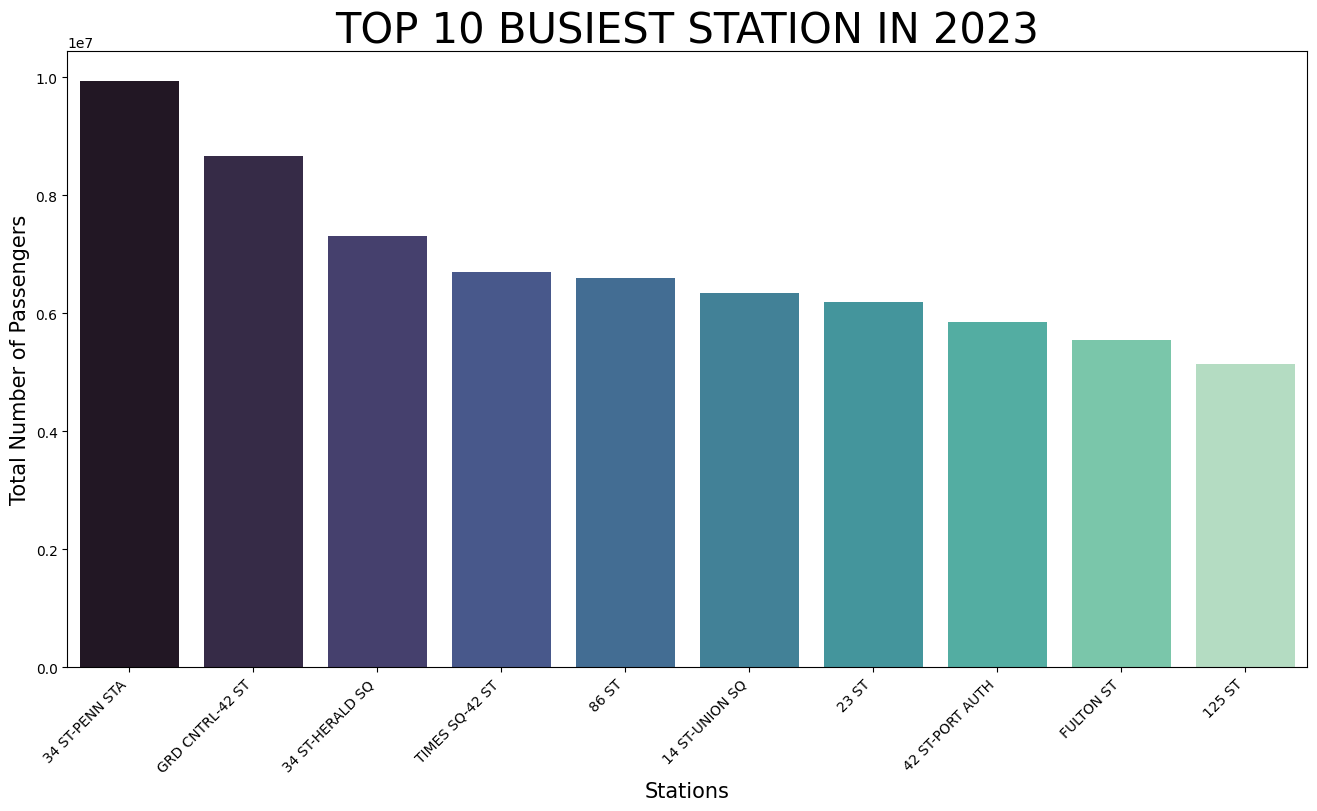

In [253]:
df_station_10 = df_total['STATION'].head(10)
df_total_10 = df_total['TOTAL'].head(10)
plt.figure(figsize = [16,8])
sns.barplot(x=df_station_10, y= df_total_10, palette="mako")
plt.title('TOP 10 BUSIEST STATION IN 2023',fontsize = 30)
plt.xlabel('Stations',fontsize=15)
plt.ylabel('Total Number of Passengers',fontsize=15)
plt.xticks(rotation=45, ha='right')

plt.savefig('top_10_busiest_station.png',transparent=True, bbox_inches='tight')
plt.show()

This code uses the Seaborn and Matplotlib libraries in Python to create a bar plot, which shows the total amount of subway traffic on each day of the week in 2023 using data from the daily_dist DataFrame, and sets various plot attributes such as title, axis labels, and font sizes.

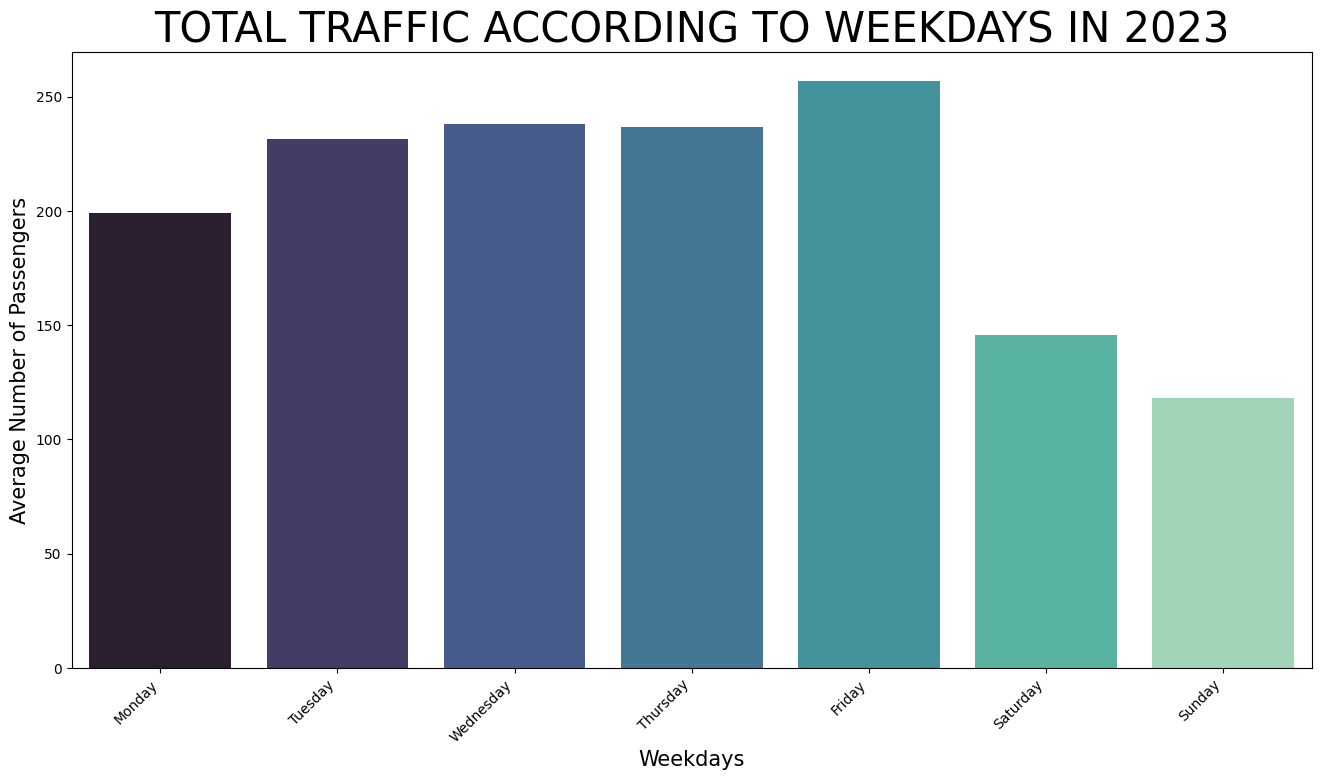

In [254]:
plt.figure(figsize = [16,8])
sns.barplot(x = daily_dist.WEEKDAYS, y = daily_dist.TOTAL,palette="mako")
plt.title('TOTAL TRAFFIC ACCORDING TO WEEKDAYS IN 2023',fontsize = 30,loc='center')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Weekdays',fontsize=15)
plt.ylabel('Average Number of Passengers',fontsize=15)
plt.savefig('total_traffic_according_to_weekdays_in_2023.png',transparent=True, bbox_inches='tight')
plt.show()

This code provides a summary of the df dataframe, including the number of non-null entries, data types, and memory usage.

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1799944 entries, 0 to 2320140
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   STATION      object        
 1   TURNSTILE    object        
 2   DATE         object        
 3   TIME         object        
 4   TIME_STAMP   datetime64[ns]
 5   WEEKDAYS     object        
 6   NET_ENTRIES  float64       
 7   NET_EXITS    float64       
 8   TOTAL        float64       
 9   W_INDEX      int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(5)
memory usage: 144.2+ MB


This code returns the unique values in the "TIME" column of the df dataframe.

In [256]:
df.TIME.unique()

array(['03:00:00', '07:00:00', '11:00:00', ..., '08:44:39', '21:08:48',
       '08:22:14'], dtype=object)

This code groups the df dataframe by "TIME", calculates the sum, sorts the values in descending order based on "TOTAL", resets the index, and assigns the result to the b_hours dataframe.

In [257]:
b_hours = df.groupby("TIME")[num_cols].sum().sort_values("TOTAL", ascending = False).reset_index()
print(b_hours)

           TIME  NET_ENTRIES   NET_EXITS       TOTAL
0      15:00:00   23279245.0  37235895.0  60515140.0
1      07:00:00   19205369.0  28835716.0  48041085.0
2      16:00:00   14892792.0  24754047.0  39646839.0
3      11:00:00   14553130.0  22473508.0  37026638.0
4      12:00:00   12947151.0  18269933.0  31217084.0
...         ...          ...         ...         ...
44669  01:09:07          1.0         1.0         2.0
44670  22:47:57          1.0         1.0         2.0
44671  19:43:43          1.0         1.0         2.0
44672  00:51:41          1.0         1.0         2.0
44673  01:33:57          1.0         1.0         2.0

[44674 rows x 4 columns]


This code returns the number of rows in the b_hours dataframe.

In [258]:
len(b_hours)

44674

This code iterates through the b_hours dataframe and categorizes each "TIME" value into one of six time intervals, updating the "TIME" column with the corresponding interval label.

In [259]:
b_hours = b_hours.copy()

for i in range(len(b_hours)):
    current_time = b_hours.loc[i, 'TIME']
    
    if current_time < '04:00:00':
        b_hours.loc[i, 'TIME'] = '00:00 - 04:00'
    elif '04:00:00' <= current_time < '08:00:00':
        b_hours.loc[i, 'TIME'] = '04:00 - 08:00'
    elif '08:00:00' <= current_time < '12:00:00':
        b_hours.loc[i, 'TIME'] = '08:00 - 12:00'
    elif '12:00:00' <= current_time < '16:00:00':
        b_hours.loc[i, 'TIME'] = '12:00 - 16:00'
    elif '16:00:00' <= current_time < '20:00:00':
        b_hours.loc[i, 'TIME'] = '16:00 - 20:00'
    elif '20:00:00' <= current_time:
        b_hours.loc[i, 'TIME'] = '20:00 - 00:00'

This code groups the b_hours dataframe by "TIME", calculates the sum, sorts the values in descending order based on "TOTAL", and resets the index.

In [260]:
b_hours=b_hours.groupby("TIME").sum().sort_values("TOTAL",ascending=False).reset_index()

This code snippet references the 'b_hours' dataframe, which contains information about the total traffic for different times of day.

In [261]:
b_hours

,TIME,NET_ENTRIES,NET_EXITS,TOTAL
0,12:00 - 16:00,41662080.0,61826172.0,103488252.0
1,08:00 - 12:00,29708774.0,46838234.0,76547008.0
2,16:00 - 20:00,27613702.0,48096418.0,75710120.0
3,04:00 - 08:00,32050111.0,42460007.0,74510118.0
4,20:00 - 00:00,7576734.0,14877931.0,22454665.0
5,00:00 - 04:00,6807223.0,7907519.0,14714742.0


This code creates a pie chart displaying the total traffic percentage for different times of day in 2023 using the b_hours dataframe and the Seaborn "mako" color palette.

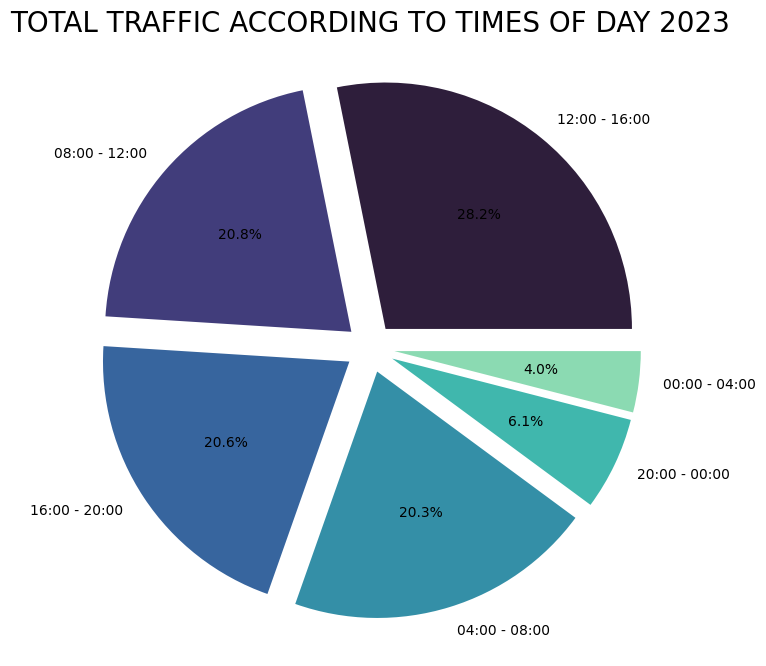

In [262]:
plt.figure(figsize=(12,8))
col = sns.color_palette("mako")[0:7]
plt.pie(b_hours.TOTAL, labels=b_hours.TIME,autopct='%1.1f%%',colors=col,explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
plt.title("TOTAL TRAFFIC ACCORDING TO TIMES OF DAY 2023",fontsize = 20,loc="center")



plt.savefig('total_traffic_according_to_times_of_day_2023.png',transparent=True, bbox_inches='tight')
plt.show()

This code filters the df dataframe to include only rows with the "34 ST-PENN STA" station, creating a new dataframe tm_busiest_station.

In [263]:
tm_busiest_station=df[df["STATION"]=="34 ST-PENN STA"]
print(tm_busiest_station)

                STATION           TURNSTILE        DATE      TIME  \
55739    34 ST-PENN STA  N067-R012-00-00-00  12/31/2022  03:00:00   
55740    34 ST-PENN STA  N067-R012-00-00-00  12/31/2022  07:00:00   
55741    34 ST-PENN STA  N067-R012-00-00-00  12/31/2022  11:00:00   
55742    34 ST-PENN STA  N067-R012-00-00-00  12/31/2022  15:00:00   
55743    34 ST-PENN STA  N067-R012-00-00-00  12/31/2022  19:00:00   
...                 ...                 ...         ...       ...   
2250641  34 ST-PENN STA  R142-R293-01-06-01  03/16/2023  22:00:00   
2250643  34 ST-PENN STA  R142-R293-01-06-01  03/17/2023  06:00:00   
2250644  34 ST-PENN STA  R142-R293-01-06-01  03/17/2023  10:00:00   
2250645  34 ST-PENN STA  R142-R293-01-06-01  03/17/2023  14:00:00   
2250646  34 ST-PENN STA  R142-R293-01-06-01  03/17/2023  18:00:00   

                 TIME_STAMP  WEEKDAYS  NET_ENTRIES  NET_EXITS  TOTAL  W_INDEX  
55739   2022-12-31 03:00:00  Saturday          6.0       34.0   40.0        5  
55740   202

This code utilizes a for loop to categorize time values into time intervals of 4 hours each, using if-else conditions to compare the time values to predefined time ranges. The code then assigns a string label to each time interval and assigns it to the corresponding time value in the "tm_busiest_station" DataFrame. The loop iterates over each index of the DataFrame's "TIME" column, and the index is incremented at the end of each loop iteration. The resulting DataFrame will have a new column of time intervals that can be used for further analysis and visualization.

In [264]:
tm_busiest_station = tm_busiest_station.copy()

for i in range(len(tm_busiest_station['TIME'].index)):
    current_time = tm_busiest_station.loc[tm_busiest_station['TIME'].index[i], 'TIME']
    
    if current_time < '04:00:00':
        tm_busiest_station.loc[tm_busiest_station['TIME'].index[i], 'TIME'] = '00:00 - 04:00'
    elif '04:00:00' <= current_time < '08:00:00':
        tm_busiest_station.loc[tm_busiest_station['TIME'].index[i], 'TIME'] = '04:00 - 08:00'
    elif '08:00:00' <= current_time < '12:00:00':
        tm_busiest_station.loc[tm_busiest_station['TIME'].index[i], 'TIME'] = '08:00 - 12:00'
    elif '12:00:00' <= current_time < '16:00:00':
        tm_busiest_station.loc[tm_busiest_station['TIME'].index[i], 'TIME'] = '12:00 - 16:00'
    elif '16:00:00' <= current_time < '20:00:00':
        tm_busiest_station.loc[tm_busiest_station['TIME'].index[i], 'TIME'] = '16:00 - 20:00'
    elif '20:00:00' <= current_time:
        tm_busiest_station.loc[tm_busiest_station['TIME'].index[i], 'TIME'] = '20:00 - 00:00'

This code references the tm_busiest_station dataframe, which contains data related to the busiest times and days for a specific station.

In [265]:
tm_busiest_station

,STATION,TURNSTILE,DATE,TIME,TIME_STAMP,WEEKDAYS,NET_ENTRIES,NET_EXITS,TOTAL,W_INDEX
55739,34 ST-PENN STA,N067-R012-00-00-00,12/31/2022,00:00 - 04:00,2022-12-31 03:00:00,Saturday,6.0,34.0,40.0,5
55740,34 ST-PENN STA,N067-R012-00-00-00,12/31/2022,04:00 - 08:00,2022-12-31 07:00:00,Saturday,26.0,151.0,177.0,5
55741,34 ST-PENN STA,N067-R012-00-00-00,12/31/2022,08:00 - 12:00,2022-12-31 11:00:00,Saturday,87.0,166.0,253.0,5
55742,34 ST-PENN STA,N067-R012-00-00-00,12/31/2022,12:00 - 16:00,2022-12-31 15:00:00,Saturday,86.0,204.0,290.0,5
55743,34 ST-PENN STA,N067-R012-00-00-00,12/31/2022,16:00 - 20:00,2022-12-31 19:00:00,Saturday,45.0,104.0,149.0,5
...,...,...,...,...,...,...,...,...,...,...
2250641,34 ST-PENN STA,R142-R293-01-06-01,03/16/2023,20:00 - 00:00,2023-03-16 22:00:00,Thursday,26.0,46.0,72.0,3
2250643,34 ST-PENN STA,R142-R293-01-06-01,03/17/2023,04:00 - 08:00,2023-03-17 06:00:00,Friday,49.0,199.0,248.0,4
2250644,34 ST-PENN STA,R142-R293-01-06-01,03/17/2023,08:00 - 12:00,2023-03-17 10:00:00,Friday,58.0,216.0,274.0,4
2250645,34 ST-PENN STA,R142-R293-01-06-01,03/17/2023,12:00 - 16:00,2023-03-17 14:00:00,Friday,76.0,263.0,339.0,4


This code groups the tm_busiest_station data by "TIME", "WEEKDAYS", and "W_INDEX", calculates the sum of "TOTAL", and creates a new dataframe G_MBS with the specified columns.

In [266]:
G_MBS = tm_busiest_station.groupby(["TIME","WEEKDAYS","W_INDEX"]).agg({"TOTAL":"sum"}).reset_index()[["TIME","WEEKDAYS","TOTAL","W_INDEX"]]
G_MBS

,TIME,WEEKDAYS,TOTAL,W_INDEX
0,00:00 - 04:00,Friday,59654.0,4
1,00:00 - 04:00,Monday,52532.0,0
2,00:00 - 04:00,Saturday,28654.0,5
3,00:00 - 04:00,Sunday,23360.0,6
4,00:00 - 04:00,Thursday,65046.0,3
5,00:00 - 04:00,Tuesday,65024.0,1
6,00:00 - 04:00,Wednesday,65297.0,2
7,04:00 - 08:00,Friday,322140.0,4
8,04:00 - 08:00,Monday,320394.0,0
9,04:00 - 08:00,Saturday,133364.0,5


This code creates a heatmap to visualize the busiest days and times at the 34 St-Penn Station using Seaborn.

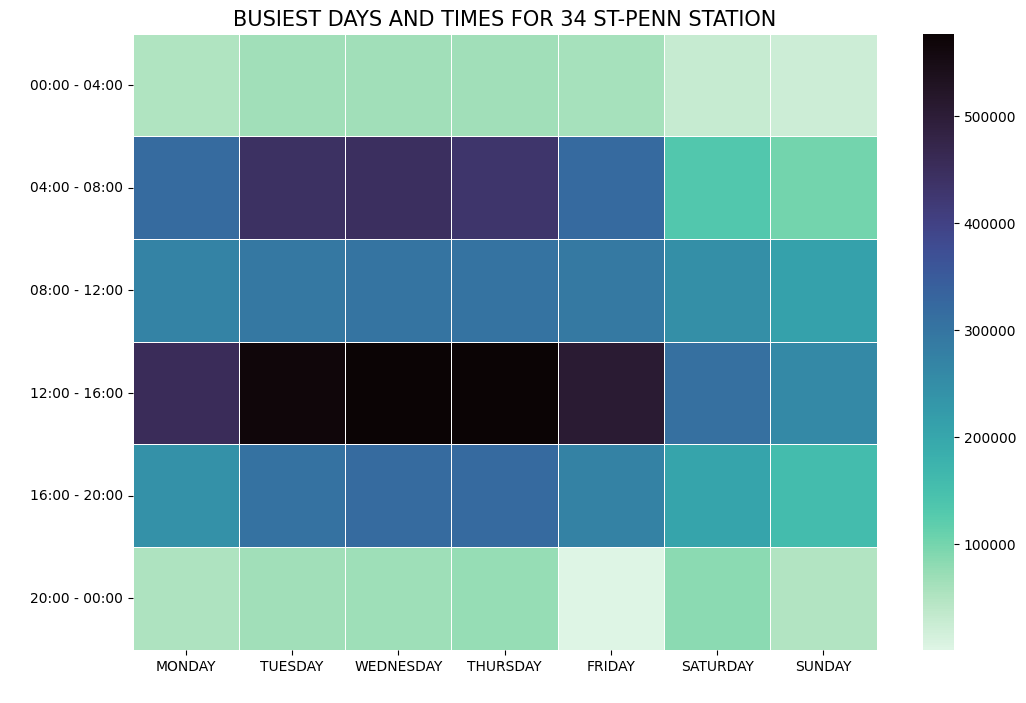

In [267]:
plt.figure(figsize=(12,8))
revels = G_MBS.pivot(index="TIME", columns="W_INDEX", values="TOTAL")
revels.columns= ["MONDAY","TUESDAY","WEDNESDAY","THURSDAY","FRIDAY","SATURDAY","SUNDAY"]
ax=sns.heatmap(revels,linewidths=0.4,cmap="mako_r")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title("BUSIEST DAYS AND TIMES FOR 34 ST-PENN STATION",fontsize = 15,loc="center")

plt.savefig('busiest_days_and_times_for_34_st-penn_station.png',transparent=True, bbox_inches='tight')
plt.show()

In [268]:
census=pd.read_csv('nyc_census_tracts.csv')
census.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,8.0,22.3,44.8,13.7,38.6,2.9,0.0,0.0,43.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,9.0,10.5,41.3,10.0,44.6,1.4,0.5,2.1,45.0,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,4.9,13.8,37.2,5.3,45.5,8.6,1.6,1.7,38.8,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,6.6,11.0,19.2,5.3,63.9,3.0,2.4,6.2,45.4,19.2


In [269]:
census.columns

Index(['CensusTract', 'County', 'Borough', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Citizen', 'Income',
       'IncomePerCap', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Unemployment'],
      dtype='object')

In [270]:
census.columns=census.columns.str.strip()

In [271]:
len(census.columns)

29

In [272]:
len(census)

2167

In [273]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CensusTract   2167 non-null   int64  
 1   County        2167 non-null   object 
 2   Borough       2167 non-null   object 
 3   TotalPop      2167 non-null   int64  
 4   Men           2167 non-null   int64  
 5   Women         2167 non-null   int64  
 6   Hispanic      2128 non-null   float64
 7   White         2128 non-null   float64
 8   Black         2128 non-null   float64
 9   Native        2128 non-null   float64
 10  Asian         2128 non-null   float64
 11  Citizen       2167 non-null   int64  
 12  Income        2110 non-null   object 
 13  IncomePerCap  2121 non-null   float64
 14  Poverty       2125 non-null   float64
 15  ChildPoverty  2107 non-null   float64
 16  Professional  2124 non-null   float64
 17  Service       2124 non-null   float64
 18  Office        2124 non-null 

In [274]:
census= census[['CensusTract','County','Borough','TotalPop','Men','Women','Income','IncomePerCap']]
census.head(20)

,CensusTract,County,Borough,TotalPop,Men,Women,Income,IncomePerCap
0,36005000100,Bronx,Bronx,7703,7133,570,NaN,2440.0
1,36005000200,Bronx,Bronx,5403,2659,2744,72034,22180.0
2,36005000400,Bronx,Bronx,5915,2896,3019,74836,27700.0
3,36005001600,Bronx,Bronx,5879,2558,3321,32312,17526.0
4,36005001900,Bronx,Bronx,2591,1206,1385,37936,17986.0
5,36005002000,Bronx,Bronx,8516,3301,5215,18086,12023.0
6,36005002300,Bronx,Bronx,4774,2130,2644,14479,9781.0
7,36005002400,Bronx,Bronx,150,109,41,NaN,49365.0
8,36005002500,Bronx,Bronx,5355,2338,3017,17226,11493.0
9,36005002701,Bronx,Bronx,3016,1375,1641,20153,10317.0


In [275]:
census.tail(20)

,CensusTract,County,Borough,TotalPop,Men,Women,Income,IncomePerCap
2147,36085024402,Richmond,Staten Island,4241,2023,2218,75167,36201.0
2148,36085024700,Richmond,Staten Island,2691,1272,1419,63162,27838.0
2149,36085024800,Richmond,Staten Island,4908,2540,2368,76270,31048.0
2150,36085025100,Richmond,Staten Island,5879,2999,2880,95239,35051.0
2151,36085027301,Richmond,Staten Island,3810,1855,1955,71724,33469.0
2152,36085027302,Richmond,Staten Island,3355,1727,1628,91023,37126.0
2153,36085027702,Richmond,Staten Island,6542,3037,3505,65764,33474.0
2154,36085027704,Richmond,Staten Island,4357,2174,2183,99107,38259.0
2155,36085027705,Richmond,Staten Island,5644,2588,3056,87800,33429.0
2156,36085027706,Richmond,Staten Island,3525,1768,1757,82308,29462.0


In [276]:
census.sample(20)

,CensusTract,County,Borough,TotalPop,Men,Women,Income,IncomePerCap
1448,36081008800,Queens,Queens,3928,1889,2039,80363,28018.0
1881,36081077902,Queens,Queens,5382,2692,2690,83629,31034.0
1874,36081074900,Queens,Queens,1488,755,733,151250,90236.0
1019,36047098400,Kings,Brooklyn,2035,888,1147,71146,26168.0
1484,36081013000,Queens,Queens,1645,951,694,67054,29160.0
1573,36081025800,Queens,Queens,2048,918,1130,67596,23334.0
1511,36081015900,Queens,Queens,3964,1898,2066,43807,26837.0
269,36005037900,Bronx,Bronx,5287,2423,2864,27841,16171.0
1759,36081055600,Queens,Queens,2453,1189,1264,71985,25540.0
1846,36081069000,Queens,Queens,3460,1354,2106,81105,26942.0


In [277]:
census['Income'].value_counts()

Income
(X)      7
60625    4
38750    4
71250    4
46250    3
        ..
52188    1
47055    1
47788    1
45642    1
56406    1
Name: count, Length: 2011, dtype: int64

Let's change the values entered as "x" to NaN

In [278]:
census['Income'] = census['Income'].replace(['(X)'], np.nan)

In [279]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CensusTract   2167 non-null   int64  
 1   County        2167 non-null   object 
 2   Borough       2167 non-null   object 
 3   TotalPop      2167 non-null   int64  
 4   Men           2167 non-null   int64  
 5   Women         2167 non-null   int64  
 6   Income        2103 non-null   object 
 7   IncomePerCap  2121 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 135.6+ KB


Let's check null values again

In [280]:
census.isnull().sum()

CensusTract      0
County           0
Borough          0
TotalPop         0
Men              0
Women            0
Income          64
IncomePerCap    46
dtype: int64

In [281]:
def clean_income(value):
    if isinstance(value, str):
        return float(value.replace(',', '').replace('+', ''))
    return value

census['Income'] = census['Income'].apply(clean_income)

census['Income']=census['Income'].astype(float)

In [282]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CensusTract   2167 non-null   int64  
 1   County        2167 non-null   object 
 2   Borough       2167 non-null   object 
 3   TotalPop      2167 non-null   int64  
 4   Men           2167 non-null   int64  
 5   Women         2167 non-null   int64  
 6   Income        2103 non-null   float64
 7   IncomePerCap  2121 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 135.6+ KB


In [283]:
census.describe()

,CensusTract,TotalPop,Men,Women,Income,IncomePerCap
count,2.167000e+03,2167.000000,2167.000000,2167.000000,2103.000000,2121.000000
mean,3.605476e+10,3888.667743,1852.812183,2035.855561,59282.869710,32163.718058
std,2.594875e+07,2240.050968,1063.921420,1212.765249,29384.434908,25309.952857
min,3.600500e+10,0.000000,0.000000,0.000000,9829.000000,2440.000000
25%,3.604703e+10,2359.500000,1113.000000,1224.500000,39107.000000,18561.000000
50%,3.604712e+10,3550.000000,1699.000000,1848.000000,54563.000000,25129.000000
75%,3.608103e+10,4957.500000,2360.500000,2571.500000,73336.500000,34346.000000
max,3.608599e+10,28926.000000,13460.000000,15466.000000,250000.000000,254204.000000


In [284]:
census['Income'].fillna(value=census['Income'].mean() , inplace=True)

In [285]:
census['IncomePerCap'].fillna(value=census['IncomePerCap'].mean() , inplace=True)

In [286]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CensusTract   2167 non-null   int64  
 1   County        2167 non-null   object 
 2   Borough       2167 non-null   object 
 3   TotalPop      2167 non-null   int64  
 4   Men           2167 non-null   int64  
 5   Women         2167 non-null   int64  
 6   Income        2167 non-null   float64
 7   IncomePerCap  2167 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 135.6+ KB


In [287]:
census.isna()

,CensusTract,County,Borough,TotalPop,Men,Women,Income,IncomePerCap
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2162,False,False,False,False,False,False,False,False
2163,False,False,False,False,False,False,False,False
2164,False,False,False,False,False,False,False,False
2165,False,False,False,False,False,False,False,False


In [288]:
census['CensusTract'].unique

<bound method Series.unique of 0       36005000100
1       36005000200
2       36005000400
3       36005001600
4       36005001900
           ...     
2162    36085030302
2163    36085031901
2164    36085031902
2165    36085032300
2166    36085990100
Name: CensusTract, Length: 2167, dtype: int64>

In [289]:
census.isnull().sum()

CensusTract     0
County          0
Borough         0
TotalPop        0
Men             0
Women           0
Income          0
IncomePerCap    0
dtype: int64

In [290]:
census[census.duplicated()]

,CensusTract,County,Borough,TotalPop,Men,Women,Income,IncomePerCap


In [291]:
census.duplicated().sum()

0

In [292]:
census.head(20)


,CensusTract,County,Borough,TotalPop,Men,Women,Income,IncomePerCap
0,36005000100,Bronx,Bronx,7703,7133,570,59282.86971,2440.0
1,36005000200,Bronx,Bronx,5403,2659,2744,72034.00000,22180.0
2,36005000400,Bronx,Bronx,5915,2896,3019,74836.00000,27700.0
3,36005001600,Bronx,Bronx,5879,2558,3321,32312.00000,17526.0
4,36005001900,Bronx,Bronx,2591,1206,1385,37936.00000,17986.0
5,36005002000,Bronx,Bronx,8516,3301,5215,18086.00000,12023.0
6,36005002300,Bronx,Bronx,4774,2130,2644,14479.00000,9781.0
7,36005002400,Bronx,Bronx,150,109,41,59282.86971,49365.0
8,36005002500,Bronx,Bronx,5355,2338,3017,17226.00000,11493.0
9,36005002701,Bronx,Bronx,3016,1375,1641,20153.00000,10317.0


In [293]:
census.tail(20)

,CensusTract,County,Borough,TotalPop,Men,Women,Income,IncomePerCap
2147,36085024402,Richmond,Staten Island,4241,2023,2218,75167.00000,36201.000000
2148,36085024700,Richmond,Staten Island,2691,1272,1419,63162.00000,27838.000000
2149,36085024800,Richmond,Staten Island,4908,2540,2368,76270.00000,31048.000000
2150,36085025100,Richmond,Staten Island,5879,2999,2880,95239.00000,35051.000000
2151,36085027301,Richmond,Staten Island,3810,1855,1955,71724.00000,33469.000000
2152,36085027302,Richmond,Staten Island,3355,1727,1628,91023.00000,37126.000000
2153,36085027702,Richmond,Staten Island,6542,3037,3505,65764.00000,33474.000000
2154,36085027704,Richmond,Staten Island,4357,2174,2183,99107.00000,38259.000000
2155,36085027705,Richmond,Staten Island,5644,2588,3056,87800.00000,33429.000000
2156,36085027706,Richmond,Staten Island,3525,1768,1757,82308.00000,29462.000000


In [294]:
Topwomen=census.groupby('Borough')['Women'].sum().sort_values(ascending=False)
Topwomen

Borough
Brooklyn         1366258
Queens           1185680
Manhattan         860073
Bronx             755910
Staten Island     243778
Name: Women, dtype: int64

In [295]:
census['Borough'].unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [296]:
print(df_top20_t_summary)

            STATION      TOTAL    BOROUGH
0    34 ST-PENN STA  9947575.0  Manhattan
1   GRD CNTRL-42 ST  8662226.0  Manhattan
2   34 ST-HERALD SQ  7307382.0  Manhattan
3    TIMES SQ-42 ST  6694284.0  Manhattan
4             86 ST  6597225.0  Manhattan
5    14 ST-UNION SQ  6342743.0  Manhattan
6             23 ST  6187458.0  Manhattan
7   42 ST-PORT AUTH  5850927.0  Manhattan
8         FULTON ST  5556798.0  Manhattan
9            125 ST  5149793.0  Manhattan
10            59 ST  4601367.0  Manhattan
11    FLUSHING-MAIN  4554733.0     Queens
12   59 ST COLUMBUS  4400224.0     Queens
13         CANAL ST  4234171.0  Manhattan
14            14 ST  4216230.0  Manhattan
15     PATH NEW WTC  4106055.0  Manhattan
16            96 ST  4101935.0  Manhattan
17  JKSN HT-ROOSVLT  3764750.0  Manhattan
18   47-50 STS ROCK  3758160.0  Manhattan
19      CHAMBERS ST  3353506.0   Brooklyn


In [297]:
print(Topwomen)

Borough
Brooklyn         1366258
Queens           1185680
Manhattan         860073
Bronx             755910
Staten Island     243778
Name: Women, dtype: int64


In [298]:
df_top20_t_cencus = df_top20_t_summary.merge(Topwomen, how='inner', left_on='BOROUGH', right_on='Borough')
df_top20_t_cencus = df_top20_t_cencus.sort_values("TOTAL", ascending=False)
print(df_top20_t_cencus)

            STATION      TOTAL    BOROUGH    Women
0    34 ST-PENN STA  9947575.0  Manhattan   860073
1   GRD CNTRL-42 ST  8662226.0  Manhattan   860073
2   34 ST-HERALD SQ  7307382.0  Manhattan   860073
3    TIMES SQ-42 ST  6694284.0  Manhattan   860073
4             86 ST  6597225.0  Manhattan   860073
5    14 ST-UNION SQ  6342743.0  Manhattan   860073
6             23 ST  6187458.0  Manhattan   860073
7   42 ST-PORT AUTH  5850927.0  Manhattan   860073
8         FULTON ST  5556798.0  Manhattan   860073
9            125 ST  5149793.0  Manhattan   860073
10            59 ST  4601367.0  Manhattan   860073
17    FLUSHING-MAIN  4554733.0     Queens  1185680
18   59 ST COLUMBUS  4400224.0     Queens  1185680
11         CANAL ST  4234171.0  Manhattan   860073
12            14 ST  4216230.0  Manhattan   860073
13     PATH NEW WTC  4106055.0  Manhattan   860073
14            96 ST  4101935.0  Manhattan   860073
15  JKSN HT-ROOSVLT  3764750.0  Manhattan   860073
16   47-50 STS ROCK  3758160.0 

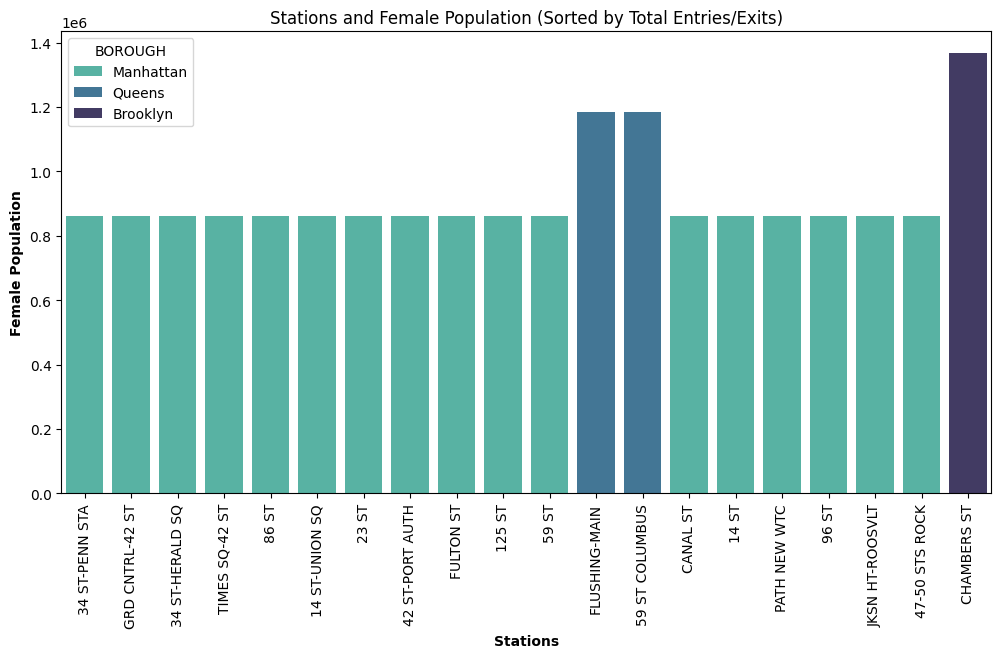

In [299]:
df_sorted_total = df_top20_t_cencus.sort_values('TOTAL', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='STATION', y='Women', hue="BOROUGH", data=df_sorted_total, palette='mako_r', dodge=False)

plt.xticks(rotation=90)
plt.title('Stations and Female Population (Sorted by Total Entries/Exits)')
plt.xlabel('Stations', fontweight='bold')
plt.ylabel('Female Population', fontweight='bold')
plt.savefig('top_10_station_with_women_population.png',transparent=True, bbox_inches='tight')
plt.show()